###### Ian Wafer
###### 19/10/19

# 1. Introduction

The tips dataset was created in the early 1990s over a period of two and a half months by an employee of a national chain restaurant located in a suburban mall. The employee recorded a number of variables as listed below-
<br>Total Bill
<br>Tip
<br>Sex
<br>Smoker
<br>Day
<br>Time
<br>Size

Since tips can be influenced by a number of different factors we can use this collected data to investigate the variables that affect the tip size and to what degree. In the below breakdowns we will explore various relationships and explain them.

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

# Set default grid style for plots
sns.set(style='darkgrid')

# Shorten code to read the tips dataset
tips = sns.load_dataset('tips', delimiter=',')

To ensure the dataset loaded correctly we will print the first and last ten lines of the dataset.

In [9]:
# Show the first 10 lines of the dataset
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [66]:
# Show the last 10 lines of the dataset
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


# 2. Data Description

Now that we have verified the dataset loaded correctly we'll take a brief look at at a breakdown of the data containing floats. Form this we can see the averages, standard deviations, minimums and incremental increases of 25% up to the maximum amount for the columns total bill, tip and size.This in itself doesn't show us any relationships between the variables but gives us an idea of the range of numbers to expect.  

At this point we'll also tidy up the column headings for future reference.

In [67]:
# Brief description of all the data with floats
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [68]:
# Clean up column headings
tips.columns = ['Total Bill ($)', 'Tip ($)', 'Sex', 'Smoker', 'Day', 'Time', 'Size']
tips.head(1)

,Total Bill ($),Tip ($),Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2


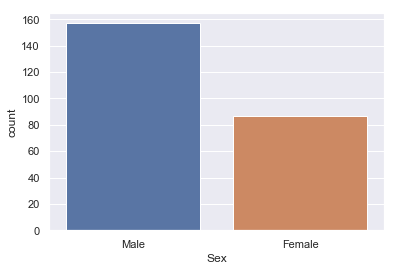

In [69]:
sns.countplot(x='Sex', data=tips)

Here we can see there is almost double the amount of males to females paying the bills at the restaurant with just under 160 males and just over 80 females paying. This would be important to conisder for sample sizing purposes but the dataset has a large enough sample from both sexes to continue the analysis and expect an accurate representation. 

Now to look at the day attendance.

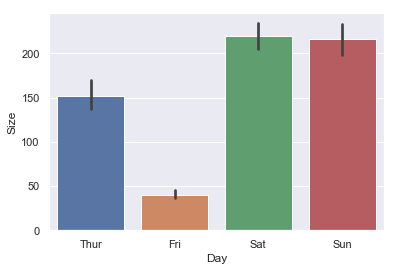

In [26]:
sns.barplot(x="Day", y="Size", data=tips, estimator=sum)

From the aove plot we can see the busiest days of the week are Saturday and Sunday with Thursday not far behind. Friday appears to be the quietist day with condierably less people atending at less than 25% of it's busiest periods.

Now to take a look at time served and also the time served broken down into each day and bill amount.

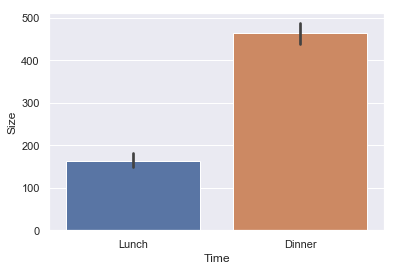

In [37]:
sns.barplot(x="Time", y="Size", data=tips, estimator=sum)

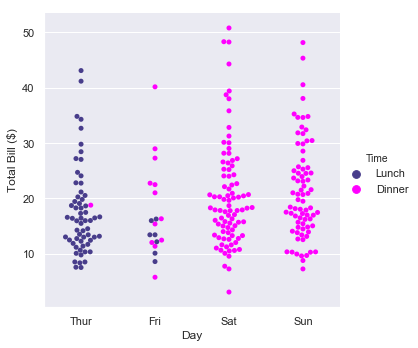

In [13]:
sns.catplot(x='Day', y='Total Bill ($)', hue='Time', palette=['darkslateblue', 'magenta'], kind='swarm', data=tips)

From the above two plots we can see that there are much more dinners served than lunches and that while lunch and dinner are served on Thursday and Friday, dinner is exclusively served on the Saturday and Sunday. Dinners account for more than 3 times the amount of meals served than lunches.

***

# 3. Relationships

The first relationship we will explore is between total bill and tip and determine if there is a trend. To do this we will use a plot and determine if the slope is in a positive direction as the total bill value increases. This would gives us an indication of a positive correlation between total bill and tips.

The values of the slope and constant respectively are [0.10502452 0.92026961]


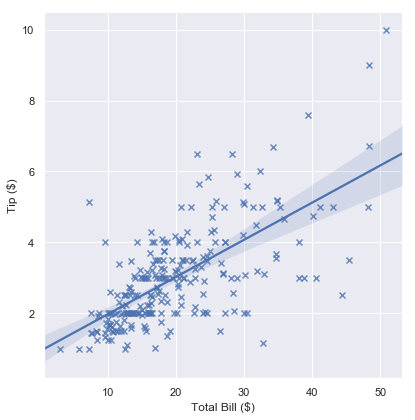

In [70]:
# Calculate best values for m (slope) and c (constant)
totallist = tips[tips.columns[0]].tolist() # Convert Total Bills column into a list
tiplist = tips[tips.columns[1]].tolist() # Convert Tips column into a list

print('The values of the slope and constant respectively are', np.polyfit(totallist, tiplist, 1)) 

# Plot relationsip with regression line shown with 95% confidence interval
sns.pairplot(tips, x_vars=['Total Bill ($)'], y_vars=['Tip ($)'], kind='reg', markers='x', height=6)

From this graph we can see that the general trend for tipping amount increases with the total bill within certain limits with exceptions in certain cases. This can be seen by the regression model line plotted with the 95% confidence interval to either side and is further shown by the positive value of the slope and constant calculated using the polyfit function. This verifies the expectation that tipping is usually done as a percentage of the total bill amount. 

***

Next we will look at breaking down this data further to determine relationships in greater depth. 

Below is a plot of the relationship of the above broken down into the time of day, divided by colour into the relevant sex the datapoints relate to with their sizes dictated by the size category of the dataset. 

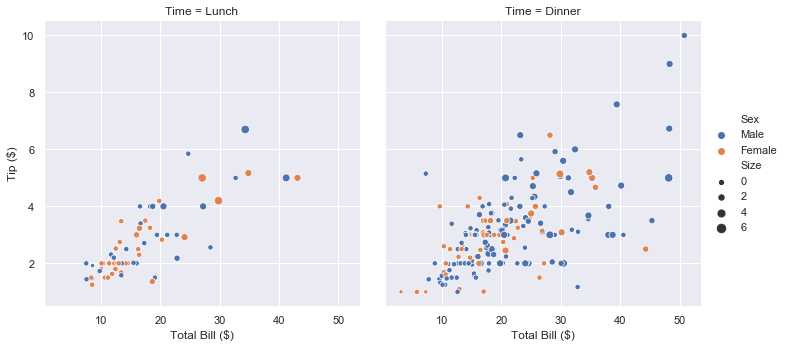

In [72]:
sns.relplot(x='Total Bill ($)', y='Tip ($)', hue='Sex', col='Time', data=tips, size='Size')

The above graphs show that there are far more dinners than lunches and that the dinner total bill is much more likely to be higher in value than the lunch bill. We can also see that the range between $10-40 total bills appear evenly split between the sexs while the higher total bills and therefore larger tips (due to the relationship shown earlier) has only the males present. This could also be due to the fact that male have twice the representation than females in this particular dataset. We can also see that the larger size tends to have a higher total bill. 

***

Below we look at the relationship between average, minimum and maximum tips between the sex and the size categories. We will also compare this information to determine if one sex is more genorous on tipping amounts.

In [82]:
tips.groupby('Sex').describe().transpose()

Sex                         Male     Female
Total Bill ($) count  157.000000  87.000000
               mean    20.744076  18.056897
               std      9.246469   8.009209
               min      7.250000   3.070000
               25%     14.000000  12.750000
               50%     18.350000  16.400000
               75%     24.710000  21.520000
               max     50.810000  44.300000
Tip ($)        count  157.000000  87.000000
               mean     3.089618   2.833448
               std      1.489102   1.159495
               min      1.000000   1.000000
               25%      2.000000   2.000000
               50%      3.000000   2.750000
               75%      3.760000   3.500000
               max     10.000000   6.500000
Size           count  157.000000  87.000000
               mean     2.630573   2.459770
               std      0.955997   0.937644
               min      1.000000   1.000000
               25%      2.000000   2.000000
               50%      2.000000   2.000000
               75%      3.000000   3.000000
               max      6.000000   6.000000

In [76]:
# Breakdown of categories of sex and size with respect to average total bill and tip amount
sexmean = tips.groupby(['Sex', 'Size']).mean()
print('Average Tips By Sex')
sexmean.round(2)

Average Tips By Sex


Total Bill ($)  Tip ($)
Sex    Size                         
Male   1               8.58     1.92
       2              17.10     2.61
       3              24.29     3.48
       4              28.08     4.17
       5              30.12     3.75
       6              41.24     5.85
Female 1               6.80     1.28
       2              15.34     2.53
       3              21.55     3.25
       4              30.28     4.02
       5              29.85     5.14
       6              28.42     4.60

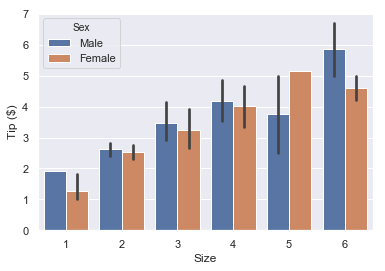

In [50]:
sns.barplot(x='Size', y='Tip ($)', hue='Sex', data=tips)

In [78]:
# Calculate best values for m (slope) and c (constant)
sizelist = tips[tips.columns[6]].tolist() # Convert Size column into a list
tiplist = tips[tips.columns[1]].tolist() # Convert Tips column into a list

print('The values of the slope and constant respectively are', np.polyfit(sizelist, tiplist, 1)) 

The values of the slope and constant respectively are [0.71182064 1.16913303]


The above breakdown shows us that group size does have an affect on the tip amount. We can see that as the group size increases so too does the tip amount with the slope given in a positive direction.

Average Tip As A Percentage Of Total Bill
Minimum Tips By Sex
Sex     Size
Male    1       1.92
        2       1.00
        3       1.66
        4       2.00
        5       2.00
        6       5.00
Female  1       1.00
        2       1.00
        3       1.36
        4       2.45
        5       5.14
        6       4.20
Name: Tip ($), dtype: float64 

Maximum Tips By Sex
Sex     Size
Male    1        1.92
        2        5.85
        3       10.00
        4        9.00
        5        5.00
        6        6.70
Female  1        1.83
        2        5.00
        3        6.50
        4        5.20
        5        5.14
        6        5.00
Name: Tip ($), dtype: float64 

Difference Between Maximum & Minimum Tips
Sex     Size
Male    1       0.00
        2       4.85
        3       8.34
        4       7.00
        5       3.00
        6       1.70
Female  1       0.83
        2       4.00
        3       5.14
        4       2.75
        5       0.00
        6       0.80
Name:

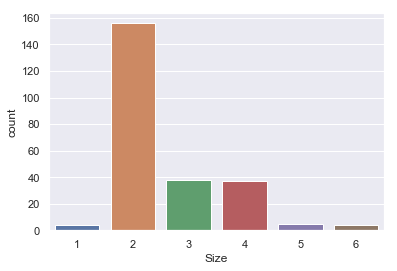

In [74]:
print('Average Tip As A Percentage Of Total Bill')
((sexmean['Tip ($)'] / sexmean['Total Bill ($)'])*100).round(0)

# Minimum tip size by sex and size of party
sexmin = tips.groupby(['Sex', 'Size'])['Tip ($)'].min()
print('Minimum Tips By Sex')
print(sexmin.round(2), '\n')

# Maximum tip size by sex and size of party
sexmax = tips.groupby(['Sex', 'Size'])['Tip ($)'].max()
print('Maximum Tips By Sex')
print(sexmax.round(2), '\n')

print('Difference Between Maximum & Minimum Tips')
print(sexmax-sexmin, '\n')

sns.countplot(x='Size', data=tips)

From the above we can see that as the group size increases so too does the average tip with the occasional anomaly. To determine if party size has an effect on the percentage of the bill tipped we need to look at the tip as a percentage of the total bill.

We can see that males and females of similar party size tip roughly the same percentage with females giving a slightly higher percentage than males as the party size increases. The percentage size trends towards roughly the same amount of 16% $\pm$5%. 

The difference between the minimum and maximum bills is very small or non existant at size 1, 5 and 6 for both sexs with a much greater differnce produced in the centre size values of 2, 3 and 4. This could be due to the small sample size attained for these sizes.

***

Next is to determine if there is any relationship in tip size with smokers. 

             Total Bill ($)  Tip ($)
Smoker Size                         
Yes    1               5.82     1.46
       2              17.96     2.71
       3              28.19     4.10
       4              30.61     3.99
       5              29.30     2.50
       6                NaN      NaN
No     1               8.66     1.42
       2              15.34     2.49
       3              21.01     3.07
       4              27.77     4.20
       5              30.58     5.05
       6              34.83     5.22 

 Average Tip Percentage Of Total Bill By Smoker 
Smoker  Size
Yes     1       25.0
        2       15.0
        3       15.0
        4       13.0
        5        9.0
        6        NaN
No      1       16.0
        2       16.0
        3       15.0
        4       15.0
        5       17.0
        6       15.0
dtype: float64


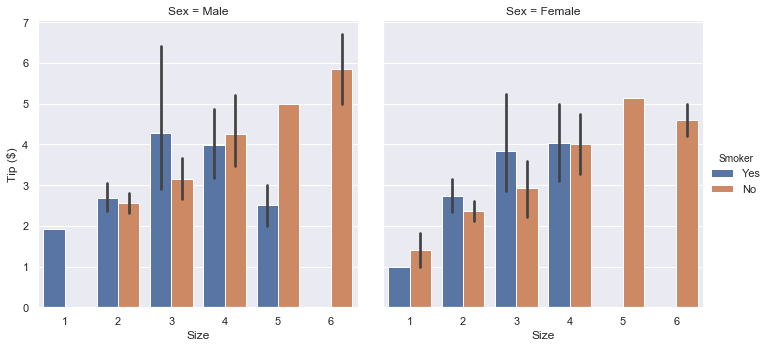

In [90]:
# Determine percentage of bill size that was tipped and round it to the closest whole number.

smokermean = tips.groupby(['Smoker', 'Size']).mean()
print(smokermean.round(2), '\n\n Average Tip Percentage Of Total Bill By Smoker ')

print(((smokermean['Tip ($)'] / smokermean['Total Bill ($)'])*100).round(0))

sns.catplot(x='Size', y='Tip ($)', hue='Smoker', col='Sex', data=tips, kind='bar')

From the above we can see very little difference in whether or not someone was a smoke with the exception of the size=1 column and a lack of data for smokers of party 6. Therefore from the clustered data in the centre we can conclude that smokers and non-smokers alike are likely to tip a similar amount. 

***



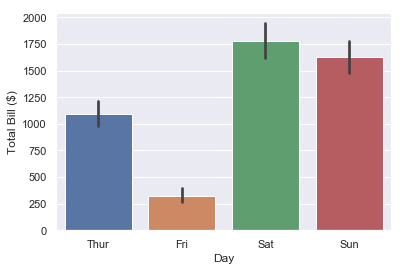

In [145]:
sns.barplot(x="Day", y="Total Bill ($)", data=tips, estimator=sum)

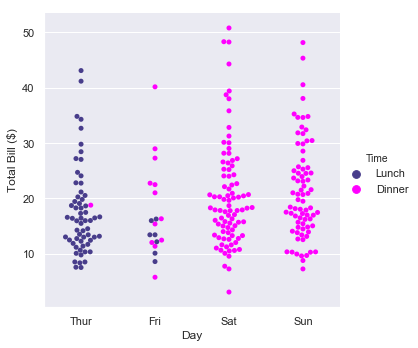

In [32]:
sns.catplot(x='Day', y='Total Bill ($)', hue='Time', palette=['darkslateblue', 'magenta'], kind='swarm', data=tips)

Source-https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700 accessed 2/11/2019
       https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ accessed 2/11/2019
       https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts accessed 2/11/2019
       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html accessed 2/11/2019
       https://seaborn.pydata.org/tutorial.html accessed 11/11/2019
       https://www.dataquest.io/blog/jupyter-notebook-tutorial/ accessed 12/11/2019

In [34]:
# Calculate best values for m and c

totalarray = tips[tips.columns[0]].tolist()
tipsarray = tips[tips.columns[1]].tolist()

# First calculate the means of Tips ($) & Total Bill ($)
total_avg = np.mean(totalarray)
tips_avg = np.mean(tipsarray)

# Subtract means from Tips & Total Bill
total_zero = totalarray - total_avg
tips_zero = tipsarray - tips_avg

# The best m is found by the following calculation
m = np.sum(tips_zero * total_zero) / np.sum(total_zero * total_zero)

# Use m from above to calculate the best c
c = tips_avg - m * total_avg

print('m is %8.6f and c is %6.6f.' % (m, c))

m is 0.105025 and c is 0.920270.


In [35]:
np.polyfit(totalarray, tipsarray, 1)

array([0.10502452, 0.92026961])